In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

In [3]:
boston = load_boston()
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

In [4]:
X_train,X_test, y_train,y_test=train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)
print(X_test.shape, y_test.shape)

(152, 13) (152,)


In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train) #선형회귀로 훈련

LinearRegression()

In [6]:
rr=Ridge(alpha=0.01)
rr.fit(X_train,y_train) #Ridge로 훈련

Ridge(alpha=0.01)

In [7]:
rr100=Ridge(alpha=100)
rr100.fit(X_train,y_train) #알파를 크게 준 Ridge 비교

Ridge(alpha=100)

In [8]:
train_score=lr.score(X_train,y_train) #score=R^2; 결정계수(=1-에러; 변동성 설명,1일수록 좋음)
test_score=lr.score(X_test,y_test)

ridge_train_score=rr.score(X_train,y_train)
ridge_test_score=rr.score(X_test,y_test)

ridge100_train_score=rr100.score(X_train,y_train)
ridge100_test_score=rr100.score(X_test,y_test)

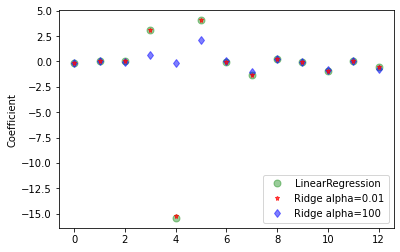

In [12]:
plt.plot(lr.coef_,alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='LinearRegression')
#coef_: 회귀계수, alpha:그림 그릴 때 투명도, 위의 알파와 다름
plt.plot(rr.coef_,alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label='Ridge alpha=0.01',zorder=7) #z축;앞쪽에 보여줌
plt.plot(rr100.coef_,alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label='Ridge alpha=100')
plt.ylabel('Coefficient')
plt.legend(loc=4)
plt.show()

#회귀계수 보여주는 그래프; label 제외한 칼럼 수가 12개이므로
#ridge가 linear보다 작은 이유: ridge가 회귀계수의 영향력을 떨어뜨리기 때문

In [16]:
ls=Lasso()
ls.fit(X_train,y_train)

ls001=Lasso(alpha=0.01, max_iter=10000)
ls001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=10000)

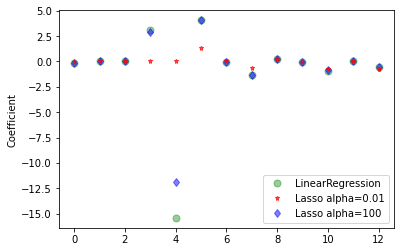

In [17]:
plt.plot(lr.coef_,alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='LinearRegression')
#coef_: 회귀계수, alpha:그림 그릴 때 투명도, 위의 알파와 다름
plt.plot(ls.coef_,alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label='Lasso alpha=0.01',zorder=7) #z축;앞쪽에 보여줌
plt.plot(ls001.coef_,alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label='Lasso alpha=100')
plt.ylabel('Coefficient')
plt.legend(loc=4)
plt.show()

#lasso에서 알파 기본값 주니까 다 0으로 만들어버림(중요하지 않은 feature에 대해 0으로)
#lasso에 알파값 작게 주니까 linear와 비슷

평가

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
titanic_df=pd.read_csv('titanic_train.csv')
y_titanic = titanic_df['Survived'] #label: 어떤 데이터 주고 생존했는지 아닌지 맞히기
X_titanic = titanic_df.drop('Survived', axis=1) #feature: X와 y로 나누기 위함

In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
X_titanic.drop('Cabin',axis=1,inplace=True) #결측치 많은 cabin 삭제

In [37]:
X_titanic['Sex'] = X_titanic['Sex'].apply(lambda x: 1 if x=='female' else 0) #남녀를 0과 1로 바꾸기
X_titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [38]:
#라벨 인코딩하는 방법 just 참고!!
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# encoder.fit(X_titanic['Sex'])
# labels=encoder.transform(X_titanic['Sex'])
# print(len(labels))

In [39]:
y_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_titanic,y_titanic,test_size=0.2,random_state=42)

In [55]:
#dummy classifier 만들기
from sklearn.base import BaseEstimator

class DummyClassifier (BaseEstimator): #상속
    def fit(self,X,y=None): #dummy니까 fit은 pass
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]): #샘플의 개수만큼 반복
            if X['Sex'].iloc[i]==1: #df인 X, X['Sex']는 Series, iloc은 인덱스로 값 가져오는 것
                pred[i] = 1
            else:
                pred[i] = 0 #성별에 따라 살았다 죽었다 판명
        return pred

In [56]:
myclf = DummyClassifier()
myclf.fit(X_train,y_train)

pred = myclf.predict(X_test)

In [58]:
accuracy_score(y_test,pred) #정확도 체크

0.7821229050279329

오차행렬

In [64]:
#실습_숫자 이미지 검증 
from sklearn.datasets import load_digits

class FakeClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass

    def pred(self,X):
        return np.zeros((len(X),1),dtype=bool)

digits = load_digits()
digits.data[0].shape

(64,)

In [65]:
digits.data[0] #이미지 픽셀 0~255까지 나눈 것; 그라데이션 0~15로 나눠서 흰색 표시

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [66]:
digits.data.shape

(1797, 64)

In [67]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

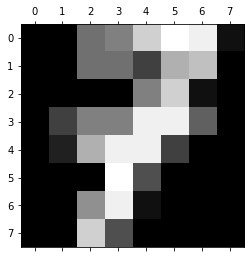

In [71]:
#숫자 이미지 출력
plt.gray()
plt.matshow(digits.images[7])
plt.show()

In [72]:
y=(digits.target==7).astype(int) #(digits.target==7); 7이면 1, 7이 아니면0으로 출력
y

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=42)

In [74]:
pd.Series(y_test).value_counts() #7인게 41개, 아닌게 409개

0    409
1     41
dtype: int64

In [75]:
fakeclf = FakeClassifier()
fakeclf.fit(X_train,y_train)
fake_pred = fakeclf.pred(X_test)
fake_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [76]:
accuracy_score(y_test,fake_pred) #아무것도 안하고 400번을 맞춤

0.9088888888888889

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fake_pred)

array([[409,   0],
       [ 41,   0]], dtype=int64)